# **SVM Training**

This notebook is used to create and train a support vector machine for use in predicting falls from video footage.

# **Importing Libraries**

In [20]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from joblib import dump, load
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# **Importing and Processing Dataset**

In [2]:
# Define the path where your files are stored
data_folder = '/content/test'

# Get file paths of all the data
files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if os.path.isfile(os.path.join(data_folder, f))]

# Load and concatenate the datasets
data = pd.concat([pd.read_csv(f) for f in files])

In [3]:
# Display the data
data

,Frame Number,X_Left Elbow,X_Left Foot,X_Left Hip,X_Left Knee,X_Left Shoulder,X_Left Wrist,X_Nose,X_Right Elbow,X_Right Foot,...,Y_Left Shoulder,Y_Left Wrist,Y_Nose,Y_Right Elbow,Y_Right Foot,Y_Right Hip,Y_Right Knee,Y_Right Shoulder,Y_Right Wrist,Annotation
0,15,0.064804,0.079156,0.065829,0.077104,0.067027,0.074900,0.083745,0.065901,0.079980,...,0.422707,0.443771,0.430994,0.515562,0.673132,0.543221,0.590726,0.448798,0.538389,No Fall
1,20,0.087524,0.059392,0.086657,0.079158,0.092550,0.095575,0.109797,0.097096,0.130689,...,0.455909,0.535542,0.441053,0.518408,0.672644,0.546324,0.577328,0.461287,0.547593,No Fall
2,25,0.133719,0.134224,0.125277,0.137344,0.132335,0.143110,0.135093,0.096382,0.091158,...,0.466155,0.539919,0.439799,0.498964,0.662321,0.551879,0.623976,0.459356,0.546508,No Fall
3,30,0.163497,0.138146,0.147418,0.143776,0.155029,0.177038,0.156189,0.104786,0.134442,...,0.455863,0.520737,0.438852,0.501164,0.683498,0.554439,0.618837,0.459144,0.551699,No Fall
4,35,0.192838,0.137868,0.167896,0.157707,0.180642,0.207660,0.176912,0.124367,0.191297,...,0.463479,0.519882,0.446006,0.504869,0.693713,0.563488,0.617288,0.470836,0.557342,No Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,75,0.267056,0.352879,0.309376,0.338733,0.226976,0.303621,0.199697,0.259784,0.380066,...,0.920671,0.920175,0.902842,0.830907,0.861114,0.828762,0.838191,0.844627,0.835411,Fall
14,80,0.266947,0.350897,0.309732,0.333642,0.227088,0.303294,0.199026,0.259898,0.391088,...,0.922369,0.922565,0.902877,0.828629,0.860829,0.830183,0.837956,0.842888,0.829726,Fall
15,85,0.264705,0.358809,0.308758,0.329728,0.226759,0.299600,0.200125,0.259447,0.394811,...,0.922589,0.923146,0.902876,0.829553,0.850408,0.830804,0.833943,0.842535,0.832584,Fall
16,90,0.264885,0.377530,0.309726,0.334814,0.226649,0.297683,0.201381,0.259645,0.392427,...,0.922944,0.923944,0.903147,0.829055,0.847403,0.831039,0.834955,0.842426,0.834776,Fall


In [4]:
# Correcting the order of features
feature_order = ["X_Nose", "Y_Nose", "X_Left Shoulder", "Y_Left Shoulder", "X_Right Shoulder", "Y_Right Shoulder",
                 "X_Left Hip", "Y_Left Hip", "X_Right Hip", "Y_Right Hip", "X_Left Knee", "Y_Left Knee",
                 "X_Right Knee", "Y_Right Knee", "X_Left Foot", "Y_Left Foot", "X_Right Foot", "Y_Right Foot",
                 "X_Left Wrist", "Y_Left Wrist", "X_Right Wrist", "Y_Right Wrist", "X_Left Elbow", "Y_Left Elbow",
                 "X_Right Elbow", "Y_Right Elbow"]

# Remove frame number column
data = data[feature_order + ['Annotation']]

In [5]:
# Displaying data checking if Frame Column has been removed
data

,X_Nose,Y_Nose,X_Left Shoulder,Y_Left Shoulder,X_Right Shoulder,Y_Right Shoulder,X_Left Hip,Y_Left Hip,X_Right Hip,Y_Right Hip,...,Y_Right Foot,X_Left Wrist,Y_Left Wrist,X_Right Wrist,Y_Right Wrist,X_Left Elbow,Y_Left Elbow,X_Right Elbow,Y_Right Elbow,Annotation
0,0.083745,0.430994,0.067027,0.422707,0.061358,0.448798,0.065829,0.544113,0.059028,0.543221,...,0.673132,0.074900,0.443771,0.078526,0.538389,0.064804,0.440699,0.065901,0.515562,No Fall
1,0.109797,0.441053,0.092550,0.455909,0.089702,0.461287,0.086657,0.545745,0.083272,0.546324,...,0.672644,0.095575,0.535542,0.103586,0.547593,0.087524,0.499795,0.097096,0.518408,No Fall
2,0.135093,0.439799,0.132335,0.466155,0.108777,0.459356,0.125277,0.552943,0.107179,0.551879,...,0.662321,0.143110,0.539919,0.106100,0.546508,0.133719,0.508388,0.096382,0.498964,No Fall
3,0.156189,0.438852,0.155029,0.455863,0.124148,0.459144,0.147418,0.552150,0.131093,0.554439,...,0.683498,0.177038,0.520737,0.105930,0.551699,0.163497,0.490601,0.104786,0.501164,No Fall
4,0.176912,0.446006,0.180642,0.463479,0.146658,0.470836,0.167896,0.562113,0.152059,0.563488,...,0.693713,0.207660,0.519882,0.125779,0.557342,0.192838,0.491537,0.124367,0.504869,No Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.199697,0.902842,0.226976,0.920671,0.220082,0.844627,0.309376,0.865866,0.305556,0.828762,...,0.861114,0.303621,0.920175,0.293457,0.835411,0.267056,0.907843,0.259784,0.830907,Fall
14,0.199026,0.902877,0.227088,0.922369,0.219908,0.842888,0.309732,0.869127,0.306468,0.830183,...,0.860829,0.303294,0.922565,0.294956,0.829726,0.266947,0.913366,0.259898,0.828629,Fall
15,0.200125,0.902876,0.226759,0.922589,0.219713,0.842535,0.308758,0.873489,0.307036,0.830804,...,0.850408,0.299600,0.923146,0.289523,0.832584,0.264705,0.918070,0.259447,0.829553,Fall
16,0.201381,0.903147,0.226649,0.922944,0.219786,0.842426,0.309726,0.874316,0.307252,0.831039,...,0.847403,0.297683,0.923944,0.289596,0.834776,0.264885,0.917542,0.259645,0.829055,Fall


In [6]:
# Standardise annotations using vectorized string operations
data['Annotation'] = data['Annotation'].str.lower()
data['Annotation'] = data['Annotation'].replace({'no fall': 'No Fall', 'fall': 'Fall'})

<ipython-input-6-f5ed546f9a3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annotation'] = data['Annotation'].str.lower()
<ipython-input-6-f5ed546f9a3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annotation'] = data['Annotation'].replace({'no fall': 'No Fall', 'fall': 'Fall'})


In [7]:
# Checking if the annotations have been standardised
data

,X_Nose,Y_Nose,X_Left Shoulder,Y_Left Shoulder,X_Right Shoulder,Y_Right Shoulder,X_Left Hip,Y_Left Hip,X_Right Hip,Y_Right Hip,...,Y_Right Foot,X_Left Wrist,Y_Left Wrist,X_Right Wrist,Y_Right Wrist,X_Left Elbow,Y_Left Elbow,X_Right Elbow,Y_Right Elbow,Annotation
0,0.083745,0.430994,0.067027,0.422707,0.061358,0.448798,0.065829,0.544113,0.059028,0.543221,...,0.673132,0.074900,0.443771,0.078526,0.538389,0.064804,0.440699,0.065901,0.515562,No Fall
1,0.109797,0.441053,0.092550,0.455909,0.089702,0.461287,0.086657,0.545745,0.083272,0.546324,...,0.672644,0.095575,0.535542,0.103586,0.547593,0.087524,0.499795,0.097096,0.518408,No Fall
2,0.135093,0.439799,0.132335,0.466155,0.108777,0.459356,0.125277,0.552943,0.107179,0.551879,...,0.662321,0.143110,0.539919,0.106100,0.546508,0.133719,0.508388,0.096382,0.498964,No Fall
3,0.156189,0.438852,0.155029,0.455863,0.124148,0.459144,0.147418,0.552150,0.131093,0.554439,...,0.683498,0.177038,0.520737,0.105930,0.551699,0.163497,0.490601,0.104786,0.501164,No Fall
4,0.176912,0.446006,0.180642,0.463479,0.146658,0.470836,0.167896,0.562113,0.152059,0.563488,...,0.693713,0.207660,0.519882,0.125779,0.557342,0.192838,0.491537,0.124367,0.504869,No Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.199697,0.902842,0.226976,0.920671,0.220082,0.844627,0.309376,0.865866,0.305556,0.828762,...,0.861114,0.303621,0.920175,0.293457,0.835411,0.267056,0.907843,0.259784,0.830907,Fall
14,0.199026,0.902877,0.227088,0.922369,0.219908,0.842888,0.309732,0.869127,0.306468,0.830183,...,0.860829,0.303294,0.922565,0.294956,0.829726,0.266947,0.913366,0.259898,0.828629,Fall
15,0.200125,0.902876,0.226759,0.922589,0.219713,0.842535,0.308758,0.873489,0.307036,0.830804,...,0.850408,0.299600,0.923146,0.289523,0.832584,0.264705,0.918070,0.259447,0.829553,Fall
16,0.201381,0.903147,0.226649,0.922944,0.219786,0.842426,0.309726,0.874316,0.307252,0.831039,...,0.847403,0.297683,0.923944,0.289596,0.834776,0.264885,0.917542,0.259645,0.829055,Fall


In [8]:
# Initialise the Label Encoder
label_encoder = LabelEncoder()

# Encode the 'Annotation' column and replace it in the dataframe
data['Annotation'] = label_encoder.fit_transform(data['Annotation'])

# Now check the unique values to confirm they are encoded
print(data['Annotation'].unique())


[1 0]


<ipython-input-8-0fce79119934>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Annotation'] = label_encoder.fit_transform(data['Annotation'])


In [9]:
#Check if the annotations have been encoded
# '1' = No Fall & '0' = Fall
data

,X_Nose,Y_Nose,X_Left Shoulder,Y_Left Shoulder,X_Right Shoulder,Y_Right Shoulder,X_Left Hip,Y_Left Hip,X_Right Hip,Y_Right Hip,...,Y_Right Foot,X_Left Wrist,Y_Left Wrist,X_Right Wrist,Y_Right Wrist,X_Left Elbow,Y_Left Elbow,X_Right Elbow,Y_Right Elbow,Annotation
0,0.083745,0.430994,0.067027,0.422707,0.061358,0.448798,0.065829,0.544113,0.059028,0.543221,...,0.673132,0.074900,0.443771,0.078526,0.538389,0.064804,0.440699,0.065901,0.515562,1
1,0.109797,0.441053,0.092550,0.455909,0.089702,0.461287,0.086657,0.545745,0.083272,0.546324,...,0.672644,0.095575,0.535542,0.103586,0.547593,0.087524,0.499795,0.097096,0.518408,1
2,0.135093,0.439799,0.132335,0.466155,0.108777,0.459356,0.125277,0.552943,0.107179,0.551879,...,0.662321,0.143110,0.539919,0.106100,0.546508,0.133719,0.508388,0.096382,0.498964,1
3,0.156189,0.438852,0.155029,0.455863,0.124148,0.459144,0.147418,0.552150,0.131093,0.554439,...,0.683498,0.177038,0.520737,0.105930,0.551699,0.163497,0.490601,0.104786,0.501164,1
4,0.176912,0.446006,0.180642,0.463479,0.146658,0.470836,0.167896,0.562113,0.152059,0.563488,...,0.693713,0.207660,0.519882,0.125779,0.557342,0.192838,0.491537,0.124367,0.504869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.199697,0.902842,0.226976,0.920671,0.220082,0.844627,0.309376,0.865866,0.305556,0.828762,...,0.861114,0.303621,0.920175,0.293457,0.835411,0.267056,0.907843,0.259784,0.830907,0
14,0.199026,0.902877,0.227088,0.922369,0.219908,0.842888,0.309732,0.869127,0.306468,0.830183,...,0.860829,0.303294,0.922565,0.294956,0.829726,0.266947,0.913366,0.259898,0.828629,0
15,0.200125,0.902876,0.226759,0.922589,0.219713,0.842535,0.308758,0.873489,0.307036,0.830804,...,0.850408,0.299600,0.923146,0.289523,0.832584,0.264705,0.918070,0.259447,0.829553,0
16,0.201381,0.903147,0.226649,0.922944,0.219786,0.842426,0.309726,0.874316,0.307252,0.831039,...,0.847403,0.297683,0.923944,0.289596,0.834776,0.264885,0.917542,0.259645,0.829055,0


In [10]:
# Separate features and target variable
X = data.drop(['Annotation'], axis=1)
y = data['Annotation']

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **SVM Model Training**

In [12]:
# Create the SVM model
svm_model = svm.SVC(kernel='linear')

In [13]:
# Train the SVM model
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
# Make predictions on testing data using SVM
y_pred = svm_model.predict(X_test)

In [16]:
# Print accuracy of the SVM
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8884120171673819


In [22]:
# Print precision score of the SVM
print("Precision Score:",metrics.precision_score(y_test, y_pred))

Precision Score: 0.8471337579617835


In [23]:
# Print recall score of the SVM
print("Recall Score:",metrics.recall_score(y_test, y_pred))

Recall Score: 0.9851851851851852


In [24]:
# Print F1 score of the SVM
print("F1 Score:",metrics.f1_score(y_test, y_pred))

F1 Score: 0.9109589041095891


<Figure size 640x480 with 0 Axes>

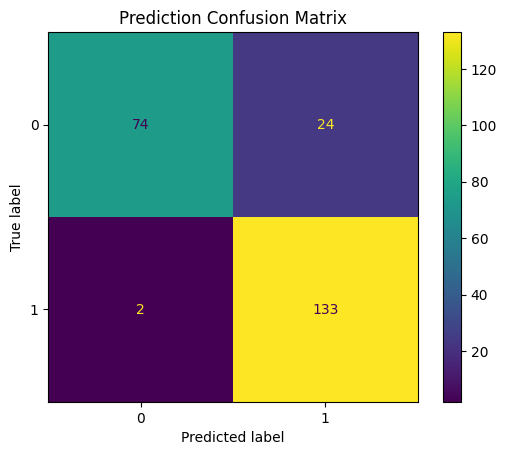

In [21]:
# Create confusion matrix of the predictions. Display the results in a plot
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
plt.figure()
disp.plot()
plt.title("Prediction Confusion Matrix")
plt.show()

# **Saving The Model**

In [ ]:
# Specify the directory and filename for the model
directory = '/content/Fall'
model_filename = 'svm_model.joblib'
full_path = os.path.join(directory, model_filename)

# Ensure the directory exists
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the trained SVM model to a file
dump(svm_model, full_path)
print("Model saved to", full_path)

Model saved to /content/Fall/svm_model.joblib


# **Loading The Model**

In [22]:
# Load the model using joblib
model_path = '/content/Fall/svm_model.joblib'
svm_model = load(model_path)